In [1]:
# load package# load 
import pandas as pd
import numpy as np
from sklearn.cross_validation  import train_test_split
from sklearn import metrics
from sklearn import preprocessing

# set path
import os
default_path = "/Users/francislin/Desktop/Machine_Learning_Workshop/Titanic/"
os.chdir(default_path)

# skip interaction warning
import warnings; 
warnings.filterwarnings('ignore')
#你可以选择修改 ast_note_iteractively kernel 选项来使得 Jupyter 为每一行的变量或语句执行这个操作，以便你可以立即看到多条语句一起输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
# Data Prepararion
# read data
train=pd.read_csv('train.csv',encoding='big5')
test=pd.read_csv('test.csv',encoding='big5')
#submit=pd.read_csv('gender_submission.csv',encoding='big5')

In [19]:
# append in ONE data
data=train.append(test, ignore_index=True)
del (train, test)

In [20]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [21]:
data['Family_Size']=data['Parch']+data['SibSp']

In [22]:
#設法整理出「尊稱」這個因子
data['Title1']=data['Name'].str.split('.',expand=True)[0]
#expand=True是讓資料在dataframe展開欄位
#1是選第二項的title
data['Title1'].head(10)
# 切出尊稱
data['Title1']=data['Title1'].str.split(', ',expand=True)[1].str.strip()#[1]代表切出第2個'dlm'前面到第一個的字串
data['Title1'].head(10)
# 秀出dintinct後的title1
data['Title1'].unique()

0         Braund, Mr
1       Cumings, Mrs
2    Heikkinen, Miss
3      Futrelle, Mrs
4          Allen, Mr
5          Moran, Mr
6       McCarthy, Mr
7    Palsson, Master
8       Johnson, Mrs
9        Nasser, Mrs
Name: Title1, dtype: object

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title1, dtype: object

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [23]:
#合併成比較常出現的姓氏在Title2
data['Title2']=''
for idx, row in data.iterrows():  # 請務必記得加上idx，不然跑回圈的item會變成(idx, row)
    Sex = row['Sex']
    Title1=row['Title1']
    if Title1=='Master':
        Title2='Master'
    elif Title1=='Mrs':
        Title2='Mrs'
    elif Title1=='Miss':
        Title2='Miss'
    elif Sex=='male':
        Title2='Mr'
    else:
        Title2='Miss'
    data.loc[idx,'Title2']=Title2 #???
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [24]:
# 票的前幾碼代號可能有意義，流水編沒有所以拿掉
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

In [25]:
#最多在S港上傳，填補遺漏值
data['Embarked']=data['Embarked'].fillna('S')

#
print('Fare遺漏的人數：',data['Fare'].isnull().sum())
#用平均填補遺漏值
data['Fare']=data['Fare'].fillna(data['Fare'].mean())

#
print('Age遺漏的人數：',data['Age'].isnull().sum())
#用中位數填補遺漏值
data['Age']=data['Age'].fillna(data['Age'].median())

Fare遺漏的人數： 1
Age遺漏的人數： 263


In [76]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,Mr,Mr,A5
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs,Mrs,PC
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,Miss,STONO2
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs,Mrs,X
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,Mr,X


In [84]:
# 運用'Survived'欄位來判斷訓練集還是測試集
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])

### Prepare for embedding Ticket_info (get_dummies)

In [85]:
dataTrain=dataTrain[['Embarked','Pclass','Sex','Family_Size','Title2','Ticket_info','PassengerId','Survived','Age','Fare']]
dataTest=dataTest[['Embarked','Pclass','Sex','Family_Size','Title2','Ticket_info','PassengerId','Survived','Age','Fare']]
X_dummies = data[['Ticket_info','Survived']]

In [86]:
X_dummies= pd.get_dummies(X_dummies, prefix='Ticket_info')

In [87]:
X_dummies_train= X_dummies[pd.notnull(X_dummies['Survived'])]

In [88]:
import logging
def X_embedding_fm(emb_X_input, X_dummies, X_dummies_train, fm_model, Survived, Ticket_info):
    #, label, train_id
    logging.info('Fit the FM model and derive the embedding values')
    fm_model.fit(X_dummies_train, emb_X_input['Survived'])
    emb_weight = fm_model.weights[1]
    X_emb = np.matmul(X_dummies.values, emb_weight)
    X_emb = pd.DataFrame(X_emb)
    #cuisine_emb = pd.DataFrame(cuisine_emb, columns=['cuisine'+edu_state[state]+str(i) for i in range(emb_weight.shape[1])])
    #return emb_weight, X_emb #想要看weight再return出來
    return X_emb

In [89]:
emb_X_input = dataTrain[['Ticket_info','Survived']]#.reset_index(drop=True)
X_dummies= X_dummies.drop(['Survived'], axis=1)
X_dummies_train= X_dummies_train.drop(['Survived'], axis=1)
Survived = dataTrain.Survived
Ticket_info = dataTrain.Ticket_info

In [90]:
import xlearn as xl
fm_model = xl.FMModel(task='binary', init=0.1, epoch=10, k=5, lr=0.1, reg_lambda=0.1, opt='sgd', metric='auc')

In [93]:
X_emb = X_embedding_fm(emb_X_input, X_dummies, X_dummies_train, fm_model, Survived, Ticket_info)

In [130]:
X_emb.head()

,0,1,2,3,4
0,4.852450e-04,3.036660e-03,3.155010e-03,4.386910e-03,3.207510e-03
1,5.422540e-05,5.027290e-05,6.227630e-05,7.250430e-05,1.004690e-05
2,2.359980e-02,5.437460e-03,1.097620e-02,1.501920e-02,7.426860e-03
3,1.183370e-30,1.636100e-30,3.398840e-31,1.229910e-30,3.239280e-31
4,1.183370e-30,1.636100e-30,3.398840e-31,1.229910e-30,3.239280e-31


In [95]:
data=pd.concat([data,X_emb], axis=1)

In [102]:
df = data[['Embarked','Pclass','Sex','Family_Size','Title2','PassengerId','Survived','Age','Fare',0,1,2,3,4]]

In [103]:
df.head()

,Embarked,Pclass,Sex,Family_Size,Title2,PassengerId,Survived,Age,Fare,0,1,2,3,4
0,S,3,male,1,Mr,1,0.0,22.0,7.2500,4.852450e-04,3.036660e-03,3.155010e-03,4.386910e-03,3.207510e-03
1,C,1,female,1,Mrs,2,1.0,38.0,71.2833,5.422540e-05,5.027290e-05,6.227630e-05,7.250430e-05,1.004690e-05
2,S,3,female,0,Miss,3,1.0,26.0,7.9250,2.359980e-02,5.437460e-03,1.097620e-02,1.501920e-02,7.426860e-03
3,S,1,female,1,Mrs,4,1.0,35.0,53.1000,1.183370e-30,1.636100e-30,3.398840e-31,1.229910e-30,3.239280e-31
4,S,3,male,0,Mr,5,0.0,35.0,8.0500,1.183370e-30,1.636100e-30,3.398840e-31,1.229910e-30,3.239280e-31


## model build

In [111]:
# 轉格式為category Embarked, Sex, Title2
df= df.astype({'Embarked':'category', 'Sex':'category', 'Title2':'category'})

In [112]:
# 運用'Survived'欄位來判斷訓練集還是測試集
dataTrain = df[pd.notnull(df['Survived'])].sort_values(by=["PassengerId"])
dataTest = df[~pd.notnull(df['Survived'])].sort_values(by=["PassengerId"])

In [113]:
dataTrain.head()# 01234欄位就是embedding後的features! cuz k =5 was set in fm_model

,Embarked,Pclass,Sex,Family_Size,Title2,PassengerId,Survived,Age,Fare,0,1,2,3,4
0,S,3,male,1,Mr,1,0.0,22.0,7.2500,4.852450e-04,3.036660e-03,3.155010e-03,4.386910e-03,3.207510e-03
1,C,1,female,1,Mrs,2,1.0,38.0,71.2833,5.422540e-05,5.027290e-05,6.227630e-05,7.250430e-05,1.004690e-05
2,S,3,female,0,Miss,3,1.0,26.0,7.9250,2.359980e-02,5.437460e-03,1.097620e-02,1.501920e-02,7.426860e-03
3,S,1,female,1,Mrs,4,1.0,35.0,53.1000,1.183370e-30,1.636100e-30,3.398840e-31,1.229910e-30,3.239280e-31
4,S,3,male,0,Mr,5,0.0,35.0,8.0500,1.183370e-30,1.636100e-30,3.398840e-31,1.229910e-30,3.239280e-31


In [114]:
dataTrain = dataTrain
#去掉y
dataTest = dataTest.drop('Survived',axis=1)
#去掉key
X_feature = dataTrain.drop(['PassengerId','Survived'],axis=1)
y_t =dataTrain['Survived']

In [115]:
#把上面dataTrain.columns的結果貼到dataTrain，再去掉'Survived'
from sklearn.model_selection import train_test_split
#拿掉feature_importances低的因子
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_t, test_size=0.3, random_state=13)

In [124]:
# Function for Measure Performance
from  sklearn  import  metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True, show_roc_auc = True):
    y_pred = clf.predict(X)
    y_predprob = clf.predict_proba(X)[:,1]
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred))),"\n"

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred)),"\n"
        
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred)),"\n"  
        
    if show_roc_auc:
        print("ROC AUC Score")
        print(metrics.roc_auc_score(y,y_predprob)),"\n"

In [116]:
%%time
import lightgbm as lgb
lgb = lgb.LGBMClassifier(object='binary')
lgb_fit=lgb.fit(X_train,y_train)

CPU times: user 216 ms, sys: 317 ms, total: 533 ms
Wall time: 324 ms


In [117]:
y_pred= lgb_fit.predict(X_test)

In [118]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average=None)
f1_score(y_test,y_pred,average='macro')
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

array([0.87719298, 0.78350515])

0.8303490685476578

0.8432835820895522

Accuracy:0.955
Classification report
             precision    recall  f1-score   support

        0.0       0.97      0.96      0.96       171
        1.0       0.93      0.95      0.94        97

avg / total       0.96      0.96      0.96       268

Confusion matrix
[[164   7]
 [  5  92]]
ROC AUC Score
0.9942123349611142
Feature importances: [120, 101, 30, 136, 140, 1013, 1200, 77, 37, 37, 47, 53]
Plot feature importances...


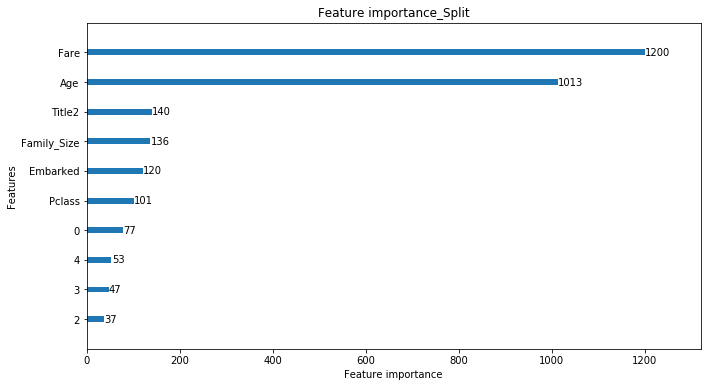

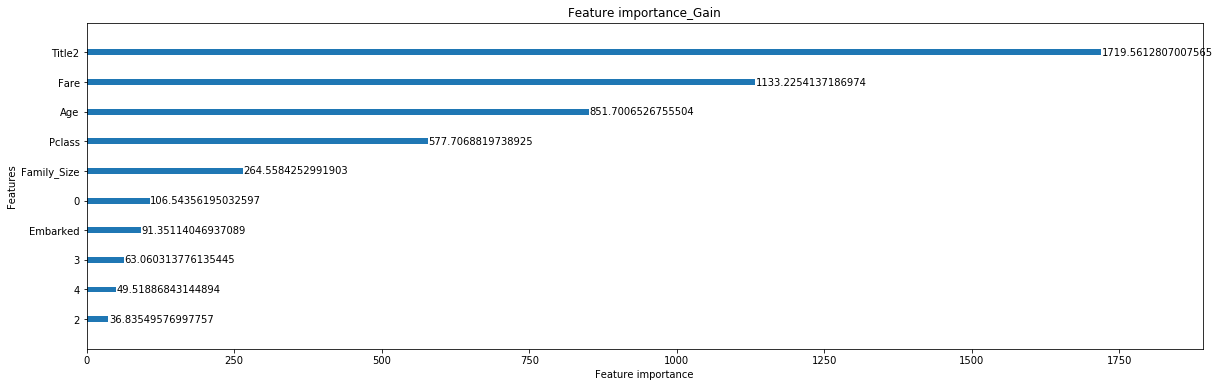

In [129]:
#對test算performance
measure = measure_performance(X = X_test, y = y_test, clf = lgb_fit, show_classification_report=True, show_confusion_matrix=True)

# feature importances
print('Feature importances:', list(lgb_fit.feature_importances_))

# visualization
import lightgbm as lgb
print('Plot feature importances...')
split_importance = lgb.plot_importance(lgb_fit, max_num_features=10, ignore_zero=False,figsize=(11, 6),grid=False, title='Feature importance_Split')
gain_importance = lgb.plot_importance(lgb_fit, max_num_features=10, importance_type='gain',figsize=(20, 6),grid=False, title='Feature importance_Gain')

In [119]:
#拿全部的dataTrain來建
lgb_fit_all = lgb_fit.fit(X_feature, y_t)

In [122]:
submit=pd.read_csv('gender_submission.csv',encoding='big5')
#predict Test data
#submit the data to kaggle
dataTest = dataTest.drop('PassengerId',axis=1)
lgb_fit_res =lgb_fit.predict(dataTest)
submit['Survived'] = lgb_fit_res
submit['Survived'] = submit['Survived'].astype(int)

In [123]:
submit.to_csv('submit_to_kaggle.csv', index= False)
%pwd

'/Users/francislin/Desktop/Machine_Learning_Workshop/Titanic'